In [ ]:
#Edgar Moises Hernandez-Gonzalez
#06/11/19
#Clasificar RAW con CNN

In [1]:
import numpy as np #se utiliza para calcular el numero de clases
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from sklearn.metrics import cohen_kappa_score, confusion_matrix, classification_report

In [2]:
x_train = pd.read_csv("MI-EEG-A01T.csv", header=None)
x_test = pd.read_csv("MI-EEG-A01E.csv", header=None)
y_train = pd.read_csv("EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("EtiquetasA01E.csv", header=None)

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 22000)
(288, 22000)
(288, 1)
(288, 1)


In [4]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [5]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [6]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [7]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
#convertir de 2D a 4D
x_train = x_train.reshape((n_samples_train, 22, 1000, 1))
x_test = x_test.reshape((n_samples_test, 22, 1000, 1))

print(x_train.shape)
print(x_test.shape)

(288, 22, 1000, 1)
(288, 22, 1000, 1)


In [9]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(22,1000,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 20, 998, 32)       320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 499, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 497, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 248, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 63488)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               8126592   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
__________

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(x_train, y_train, epochs=20, batch_size=18, validation_data=(x_test, y_test))

Train on 288 samples, validate on 288 samples
Epoch 1/20
288/288 [==============================] - 3s 12ms/sample - loss: 2.4340 - acc: 0.2326 - val_loss: 1.3858 - val_acc: 0.2882
Epoch 2/20
288/288 [==============================] - 2s 6ms/sample - loss: 1.3793 - acc: 0.3333 - val_loss: 1.3755 - val_acc: 0.2465
Epoch 3/20
288/288 [==============================] - 2s 6ms/sample - loss: 1.3114 - acc: 0.4201 - val_loss: 1.3664 - val_acc: 0.2986
Epoch 4/20
288/288 [==============================] - 2s 7ms/sample - loss: 1.1230 - acc: 0.5729 - val_loss: 1.2958 - val_acc: 0.3715
Epoch 5/20
288/288 [==============================] - 2s 8ms/sample - loss: 0.8291 - acc: 0.6736 - val_loss: 1.3762 - val_acc: 0.3264
Epoch 6/20
288/288 [==============================] - 2s 7ms/sample - loss: 0.6200 - acc: 0.7743 - val_loss: 1.4901 - val_acc: 0.3125
Epoch 7/20
288/288 [==============================] - 2s 8ms/sample - loss: 0.4717 - acc: 0.8264 - val_loss: 1.4153 - val_acc: 0.3715
Epoch 8/20
288/

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

288/288 [==============================] - 0s 2ms/sample - loss: 2.3579 - acc: 0.4549
Test loss: 2.357861624823676
Test accuracy: 0.4548611


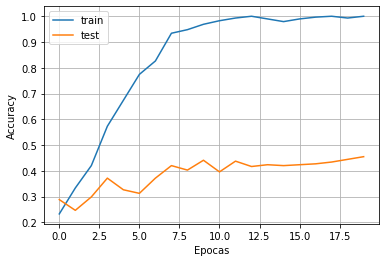

In [14]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

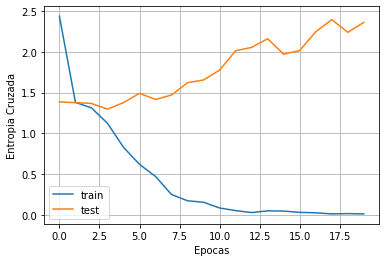

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Entropia Cruzada')
plt.legend(['train', 'test'])
plt.show()

In [16]:
probabilidades = model.predict(x_test)
y_pred = np.argmax(probabilidades, 1) #1=fila

In [17]:
kappa = cohen_kappa_score(y_test, y_pred)
print(kappa)

0.27314814814814814


In [18]:
matrizConfusion = confusion_matrix(y_test, y_pred)
print(matrizConfusion)

[[29 28  6  9]
 [26 37  3  6]
 [16  7 24 25]
 [10  5 16 41]]


In [19]:
reporteClassificacion = classification_report(y_test, y_pred)
print(reporteClassificacion)

              precision    recall  f1-score   support

           0       0.36      0.40      0.38        72
           1       0.48      0.51      0.50        72
           2       0.49      0.33      0.40        72
           3       0.51      0.57      0.54        72

   micro avg       0.45      0.45      0.45       288
   macro avg       0.46      0.45      0.45       288
weighted avg       0.46      0.45      0.45       288

